In [13]:
pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


### 1. Implement the Harris algorithm using OpenCV.

In [14]:
import cv2
import numpy as np

# Load the image
filename = r"C:\Users\Dell\OneDrive\Downloads\building.jpg" 
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to float32
gray = np.float32(gray)

# Apply the Harris corner detector
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the resulting image
cv2.imshow('Harris Corners', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Implement Image Pyramid using OpenCv

In [17]:
import cv2

# Load the image
filename = r"C:\Users\Dell\OneDrive\Downloads\pyramid.jpg"
img = cv2.imread(filename)

if img is None:
    print("Error: Image not found or unable to load.")
    exit()

# Create a list to store the pyramid images
pyramid_images = [img]

# Generate Gaussian Pyramid
for i in range(3):  # Adjust the range to control the number of levels in the pyramid
    img = cv2.pyrDown(img)
    pyramid_images.append(img)

# Display the pyramid images
for i, img in enumerate(pyramid_images):
    cv2.imshow(f'Pyramid Level {i}', img)

cv2.waitKey(0)
cv2.destroyAllWindows()


### 3. Implement Image Segmentation with Watershed Algorithm using OpenCV

Binary thresholding successful
Sure foreground thresholding successful
Connected components labeling successful


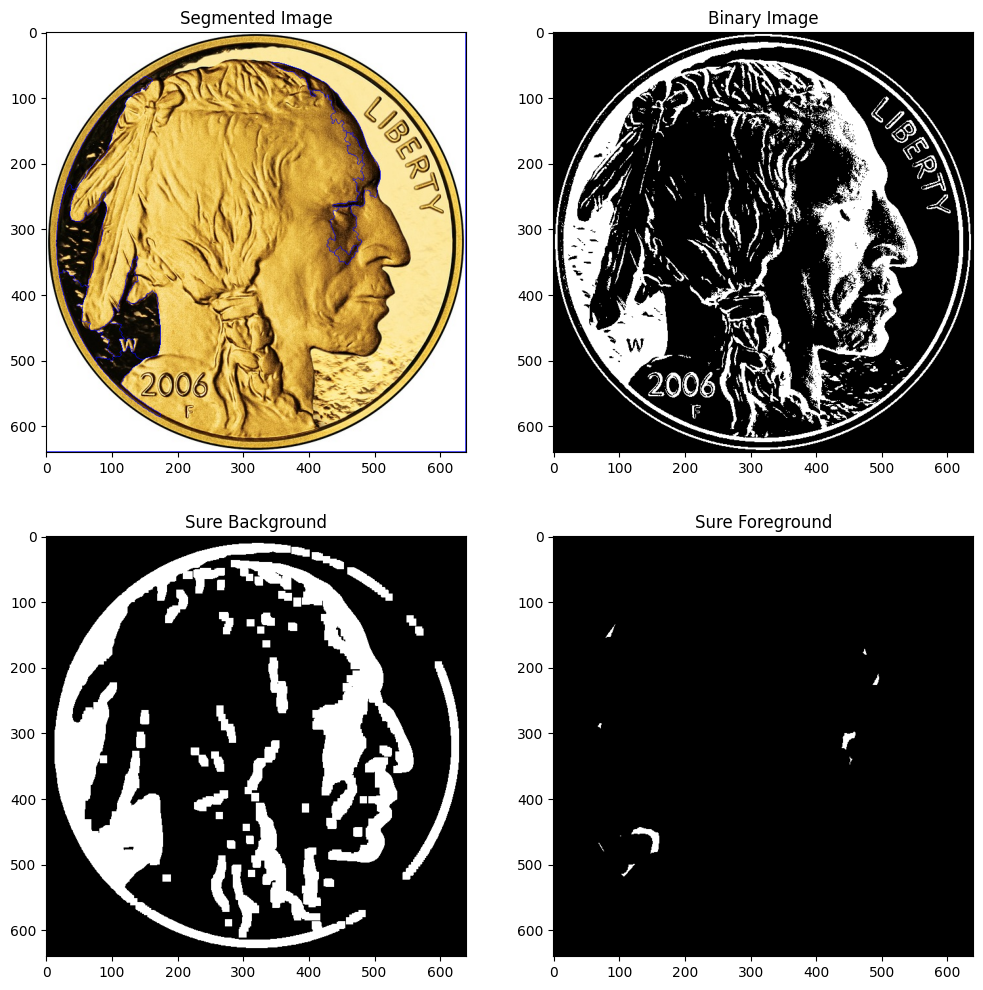

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


%matplotlib inline


filename = r"C:\Users\Dell\OneDrive\Downloads\coin.jpg"
img = cv2.imread(filename)

if img is None:
    print("Error: Image not found or unable to load.")
    exit()


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


if ret:
    print("Binary thresholding successful")
else:
    print("Binary thresholding failed")


kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)


sure_bg = cv2.dilate(opening, kernel, iterations=3)


dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


if ret:
    print("Sure foreground thresholding successful")
else:
    print("Sure foreground thresholding failed")

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
ret, markers = cv2.connectedComponents(sure_fg)

# Check if connected components labeling worked
if ret:
    print("Connected components labeling successful")
else:
    print("Connected components labeling failed")

# Add one to all labels so that the sure background is not 0 but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(img, markers)

# Mark boundaries in the original image
img[markers == -1] = [255, 0, 0]


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
binary_rgb = cv2.cvtColor(binary, cv2.COLOR_GRAY2RGB)
sure_bg_rgb = cv2.cvtColor(sure_bg, cv2.COLOR_GRAY2RGB)
sure_fg_rgb = cv2.cvtColor(sure_fg, cv2.COLOR_GRAY2RGB)

# Display the images
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(img_rgb), plt.title('Segmented Image')
plt.subplot(2, 2, 2), plt.imshow(binary_rgb), plt.title('Binary Image')
plt.subplot(2, 2, 3), plt.imshow(sure_bg_rgb), plt.title('Sure Background')
plt.subplot(2, 2, 4), plt.imshow(sure_fg_rgb), plt.title('Sure Foreground')
plt.show()


## 4.Implement SIFT algorithm using OpenCV.

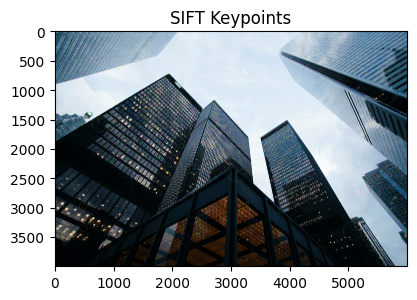

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = r"C:\Users\Dell\OneDrive\Downloads\skyscraper.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT detector object
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)), plt.title('SIFT Keypoints')
plt.show()


In [6]:
pip install opencv-python-headless matplotlib numpy

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.2/38.8 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.7/38.8 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.8 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.8 MB 12.7 MB/s eta 0:00:03
   ---- ----------------------------------- 4.0/38.8 MB 14.9 MB/s eta 0:00:03
   ----- ---------------------------------- 5.1/38.8 MB 16.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/38.8 MB 17.3 MB/s eta 0:00:02
   -------- ------------------------------- 8.0/38.8 MB 19.7 MB/s eta 0:00:02
   -------- ------------------------------- 8.7/38.8 MB 19.1 MB/s eta 0:00:02
   ---------- ----------------------------- 10.1/38.8 MB 20.1 MB/s eta 0:00:02
   ----------- ---------------------------- 11.6/38.8 MB 27.3 MB/s eta 0:00

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## 5. Implement object detection using YOLO on the COCO dataset. Provide the results for any 5 images (for testing purposes) from the dataset.

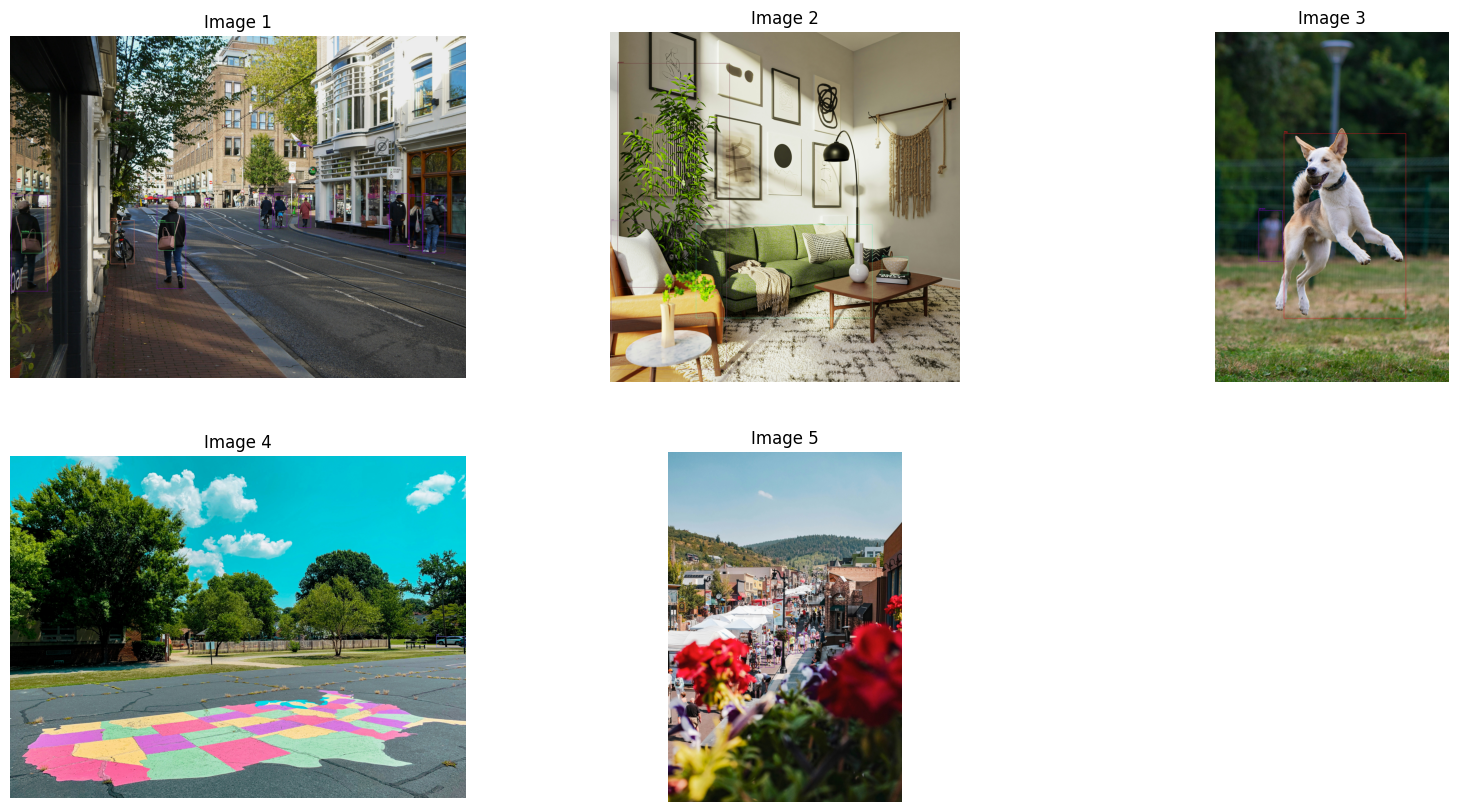

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide the full paths to the YOLO files
yolo_cfg_path = r"C:\Users\Dell\OneDrive\Downloads\yolov3.cfg"
yolo_weights_path = r"C:\Users\Dell\OneDrive\Downloads\yolov3.weights"
coco_names_path = r"C:\Users\Dell\OneDrive\Downloads\coco.names"

# Load YOLO
net = cv2.dnn.readNet(yolo_weights_path, yolo_cfg_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load COCO class labels
with open(coco_names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load images
image_paths = [
    r"C:\Users\Dell\OneDrive\Downloads\street.jpg",  
    r"C:\Users\Dell\OneDrive\Downloads\livingroom.jpg",
    r"C:\Users\Dell\OneDrive\Downloads\dog.jpg",
    r"C:\Users\Dell\OneDrive\Downloads\ground.jpg",
    r"C:\Users\Dell\OneDrive\Downloads\market.jpg"
]

# Set up colors for different classes
colors = np.random.uniform(0, 255, size=(len(classes), 3))

def detect_objects(image_path):
    # Load image
    img = cv2.imread(image_path)
    height, width, channels = img.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize parameters
    class_ids = []
    confidences = []
    boxes = []

    # Extract information from the outputs
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Max Suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return img

# Perform detection and display results
plt.figure(figsize=(20, 10))
for i, image_path in enumerate(image_paths):
    result_img = detect_objects(image_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i + 1}")
    plt.axis("off")

plt.show()
